This dataset contains job descriptions out of which a pecerntage of them are fake. The data consists of both textual information and meta-information about the jobs. The primary purpose of this dataset is to facilitate the development of models capable of identifying fraudulent job postings.

In [1]:
import pandas as pd
df = pd.read_csv('fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [3]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [5]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
df['description'].str.len()

0         905.0
1        2077.0
2         355.0
3        2600.0
4        1520.0
          ...  
17875    1442.0
17876    1216.0
17877    1291.0
17878     506.0
17879    1877.0
Name: description, Length: 17880, dtype: float64

Visuals

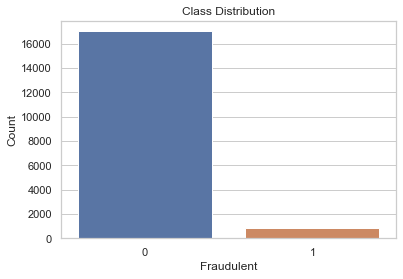

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set(style="whitegrid")

# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='fraudulent')
plt.title('Class Distribution')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.show()

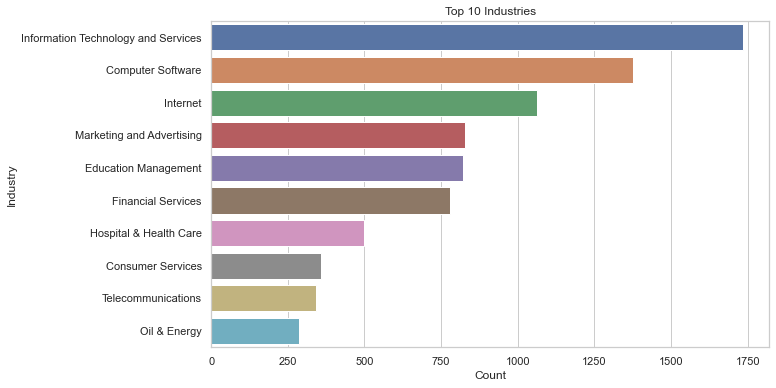

In [8]:
# Plot the top 10 industries
plt.figure(figsize=(10, 6))
top_industries = df['industry'].value_counts().head(10)
sns.barplot(x=top_industries.values, y=top_industries.index)
plt.title('Top 10 Industries')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()

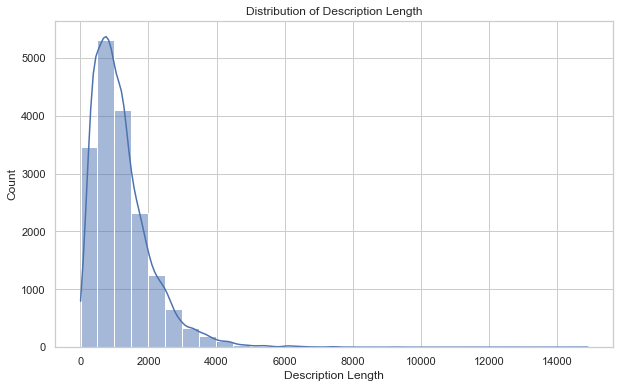

In [9]:
# Plot a histogram of job descriptions' lengths
plt.figure(figsize=(10, 6))
df['description_length'] = df['description'].str.len()
sns.histplot(data=df, x='description_length', bins=30, kde=True)
plt.title('Distribution of Description Length')
plt.xlabel('Description Length')
plt.ylabel('Count')
plt.show()

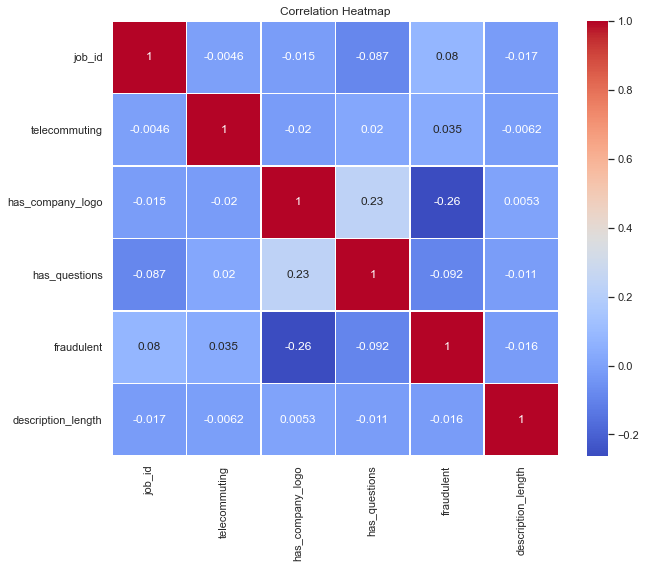

In [10]:
# Plot a heatmap of correlations between features
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Data preprocessing 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Handling missing values in the 'description' column
df['description'].fillna('', inplace=True)

# Separate numerical and categorical columns
numerical_cols = ['telecommuting', 'has_company_logo', 'has_questions']
categorical_cols = ['department', 'salary_range', 'company_profile', 'employment_type', 'industry', 'function']

# Text data preprocessing using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
text_features = tfidf_vectorizer.fit_transform(df['description']).toarray()

# One-hot encode categorical variables
encoded_categorical_features = pd.get_dummies(df[categorical_cols], columns=categorical_cols)

# Scaling numerical features
scaler = StandardScaler()
numerical_features = df[numerical_cols]
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Concatenate processed features
X = np.concatenate((text_features, encoded_categorical_features, scaled_numerical_features), axis=1)
y = df['fraudulent']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,description_length
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,905.0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,2077.0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,355.0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,2600.0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1520.0


In [13]:
#To check if preprocessing was successfull
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (14304, 5096)
Shape of X_test: (3576, 5096)
Shape of y_train: (14304,)
Shape of y_test: (3576,)


Building the model 

RandomForestClassifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.977069351230425
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       1.00      0.55      0.71       181

    accuracy                           0.98      3576
   macro avg       0.99      0.77      0.85      3576
weighted avg       0.98      0.98      0.97      3576



Support Vector Machine (SVM)

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM model using the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", classification_rep_svm)


SVM Accuracy: 0.9815436241610739
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3395
           1       0.88      0.74      0.80       181

    accuracy                           0.98      3576
   macro avg       0.93      0.87      0.90      3576
weighted avg       0.98      0.98      0.98      3576



Hyperparameters 

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create an SVM classifier
svm_classifier = SVC()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate the best model on the testing data
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("Best Model Accuracy:", accuracy_best)


Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Model Accuracy: 0.9846196868008948


Feature importance analysis for the RandomForestClassifier model

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation feature importances
result = permutation_importance(clf, X_train, y_train, n_repeats=30, random_state=0)

# Get feature names
feature_names = list(encoded_categorical_features.columns) + numerical_cols + list(tfidf_vectorizer.get_feature_names_out())

# Create a DataFrame to associate feature names with their importance scores
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': result.importances_mean})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances as a bar plot
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.tight_layout()
plt.show()


In [22]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Define a function for text preprocessing
def preprocess_text_data(text_data):
    # Check for missing values and replace with an empty string
    text_data = text_data.fillna('')
    
    # Lowercase the text
    text_data = text_data.str.lower()
    
    # Remove punctuation
    text_data = text_data.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    
    # Tokenization
    text_data = text_data.apply(lambda x: word_tokenize(x))
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text_data = text_data.apply(lambda x: [word for word in x if word not in stop_words])
    
    # Join tokens back into text
    text_data = text_data.apply(lambda x: ' '.join(x))
    
    return text_data


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\habay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\habay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Key features, words or phrases that are common with frudulant job postings  

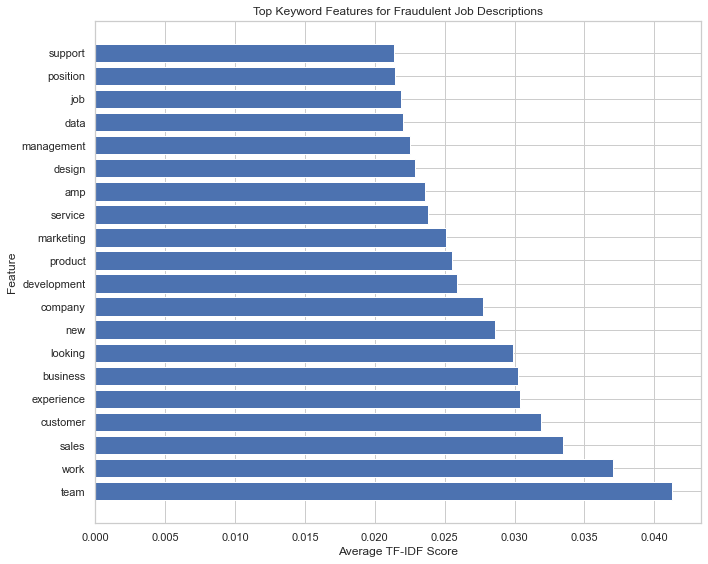

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess the text data and create a list of job descriptions
preprocessed_descriptions = preprocess_text_data(df['description'])

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_descriptions)

# Get feature names (words/phrases) from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Calculate the average TF-IDF score for each feature across all job descriptions
average_tfidf_scores = tfidf_matrix.mean(axis=0).tolist()[0]

# Create a DataFrame to associate features with their average TF-IDF scores
tfidf_df = pd.DataFrame({'Feature': feature_names, 'Average_TFIDF': average_tfidf_scores})

# Sort the DataFrame by average TF-IDF score in descending order
tfidf_df = tfidf_df.sort_values(by='Average_TFIDF', ascending=False)

# Plot the top features as a bar chart
top_features = tfidf_df.head(20)
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Average_TFIDF'])
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Feature')
plt.title('Top Keyword Features for Fraudulent Job Descriptions')
plt.tight_layout()
plt.show()


Insights on the project

Detecting fraudulent job postings is crucial for several reasons, as it can have significant impacts on both job seekers and employers. It could be used in identity theft schemes, financial scams, and ruining the image of a brand. The Federal Trade Commission (FTC) in the United States reported a significant increase in online job scams. In 2020, they received over 216,000 reports of such scams, with reported losses exceeding $150 million.

The goal of this project is to build a model that can distinguish between genuine and fraudulent job postings.


Model Building:

I used RandomForestClassifier and Support Vector Machine (SVM) to build my models, and after evaluating them, the SVM performed slightly better, and even more so after performing hyperparameter tuning.


Limitations: Because of the limited amount of data, the model can only work accurately with data that has been wrangled similarly to the training data, and as such, it might not be able to make accurate predictions with newly gathered data unless it was scraped and wrangled specifically for this model.

Future Work: Potential improvements would be to increase the amount of data the model is trained on and also increase the variety of the data.


Additional Features: A web app could be created where a job posting could be inputted, and it will show the probability of it being fake or real.


Acknowledgments: The dataset used for this project was sourced from Kaggle.